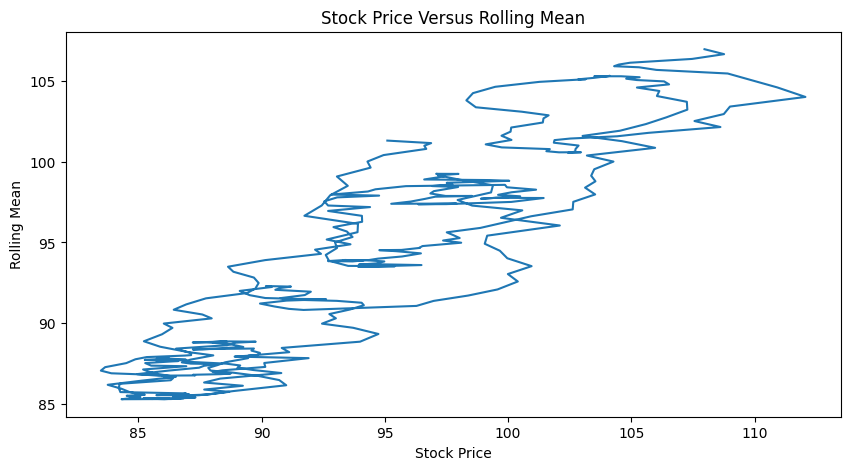

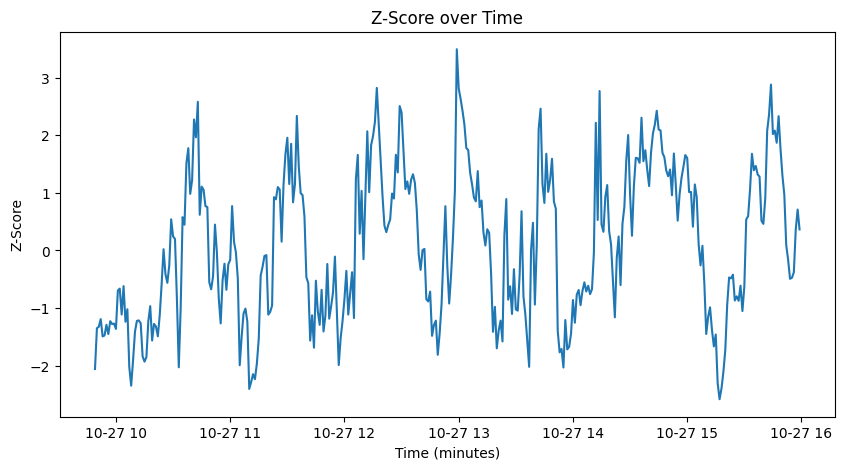

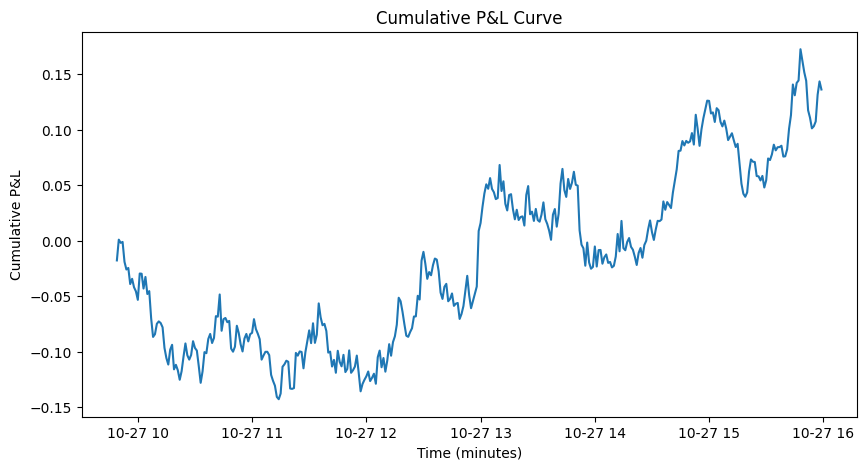

Total Return:   13.6087%
Sharpe Ratio:   0.4807
Maximum Drawdown:   180.5369%

                        0
cum_return     13.608745
mean_return     0.000367
vol_return      0.012113
sharpe_ratio    0.480707
max_drawdown  180.536905


/var/folders/nn/rjk_sthj67g1rcv7qxd8_14m0000gn/T/ipykernel_77186/1470511248.py:113: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_return = (S_df['Cumulative P&L'][-1]) * 100


In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Noisy 'Price' Generation Parameters ---

S0 = 100
mu = 0.02
sigma = 0.25

# --- Simulation Parameters ---

N = 1
steps = 390
dt = 1 / steps

# --- Brownian Motion Generation ---

np.random.seed(42)
Z = np.random.standard_normal((steps, N))

# --- Price Path Formation ---
S = np.zeros((steps, N))
S[0] = S0

for t in range(1, steps):
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z[t])

# --- Date-Time Index Formation ---

start_date = '2025-10-27 09:30:00'
end_date = '2025-10-27 15:59:00'
minutes_index = pd.date_range(start = start_date, end = end_date, freq = 'min')
minutes_index

# --- Save Time Series Index ---

S_df = pd.DataFrame(S, index = minutes_index, columns =['PX'])

# --- Rolling Indicators Computation ---

window_size = 20
S_df['Rolling_Mean'] = S_df['PX'].rolling(window = window_size).mean()
S_df['Rolling_Std'] = S_df['PX'].rolling(window = window_size).std()
S_df['Z-score'] = (S_df['PX'] - S_df['Rolling_Mean']) / S_df['Rolling_Std']
S_df

# --- Rolling Indicator Data Visualisation ---
plt.figure(figsize = (10, 5))
plt.plot(S_df['PX'], S_df['Rolling_Mean']);
plt.title('Stock Price Versus Rolling Mean');
plt.xlabel('Stock Price');
plt.ylabel('Rolling Mean');
plt.show();

plt.figure(figsize = (10, 5));
plt.plot(S_df['Z-score']);
plt.title('Z-Score over Time');
plt.xlabel('Time (minutes)');
plt.ylabel('Z-Score');
plt.show();

# --- Signal Generation ---

S_df['Position'] = 'Hold'

S_df['Position'] = np.where(
    S_df['Z-score'] < -1,
    +1,
    S_df['Position']
)

S_df['Position'] = np.where(
    S_df['Z-score'] > 1,
    -1,
    S_df['Position']
)

S_df['Position'] = np.where(
    abs(S_df['Z-score']) < 0.25,
    0,
    S_df['Position']
)

# --- Shifting Positions ---

S_df['Position'].shift(1)


# --- P&L Performance Metrics ---

S_df['Returns'] = (S_df['PX'] - S_df['PX'].shift(1)) / S_df['PX'].shift(1)
S_df['Returns']

S_df['Strategy Returns'] = (S_df['PX'].shift(0) - S_df['PX'].shift(1)) / S_df['PX'].shift(1)

# --- Data Cleaning ---

S_df = S_df.dropna()

# --- Calculating P&L Curve and Metrics ---

S_df['Cumulative P&L'] =  S_df['Strategy Returns'].cumsum()

plt.figure(figsize = (10, 5));
plt.plot(S_df['Cumulative P&L']);
plt.title('Cumulative P&L Curve')
plt.ylabel('Cumulative P&L');
plt.xlabel('Time (minutes)');
plt.show();

cum_return = (S_df['Cumulative P&L'][-1]) * 100

mean_return = S_df['Returns'].mean()
vol_return = S_df['Returns'].std()
sharpe_ratio = ((S_df['Returns'].mean() / S_df['Returns'].std()) * np.sqrt(252))

max_drawdown = ((max(S_df['Returns']) - min(S_df['Returns'])) / max(S_df['Returns'])) * 100


print(f"Total Return:   {cum_return:.4f}%");
print(f"Sharpe Ratio:   {sharpe_ratio:.4f}");
print(f"Maximum Drawdown:   {max_drawdown:.4f}%");

metrics = cum_return, mean_return, vol_return, sharpe_ratio, max_drawdown
index = 'cum_return', 'mean_return', 'vol_return', 'sharpe_ratio', 'max_drawdown'


tidy_table = pd.DataFrame(metrics, index = index)

print('\n', tidy_table)




